# <center> Primer entrega de Proyecto final</center>
### <center>Data Science</center>

###<center> Equipo: Federico Motolo, Luna Isaías y Florencia Alvarez </center> 


##<center><b>¿Quiénes somos?</b></center>  
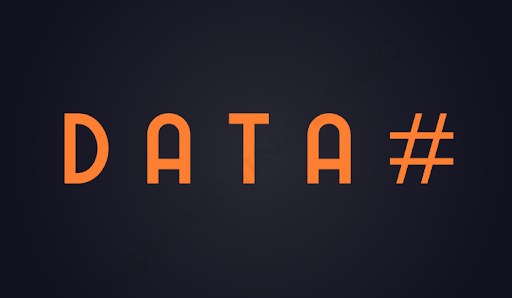 

Data# pretende ser una compañía enfocada a proveer servicios a productoras musicales, productores y artistas independientes, generando productos relevantes para cada caso particular, basados en el recurso más importante en la actualidad: la información. \\
Las aplicaciones de streaming son una gran fuente de datos que pueden transformarse en potentes herramientas a la hora de tomar decisiones como inversiones, enfoque artístico y selección de portfolio. \\
El servicio Predict-onSpot ofrece la chance de evaluar no sólo los cambios de paradigma de consumo musical a lo largo de las últimas décadas, sino predecir si el producto musical que intentamos lanzar al mercado es susceptible de lograr la cantidad de escuchas mensuales que deseamos de acuerdo a los parámetros actuales, o bien, si es susceptible de llegar a los principales rankings mundiales. \\ 
Utilizando los datos que Spotify provee, como principal servicio de streaming musical de los últimos años, podemos generar información de alto valor tanto para Management dedicado o los mismos artistas que forman parte del mercado pertinente. 

### El equipo:

<b> Florencia Álvarez </b>:  Ingeniera Sr. en Calidad de Software, especializada en productos orientados a BI y Data Science y egresada de la carrera de Producción Musical. Actualmente se desempeña ofreciendo consultoría de QA para clientes globales y desarrollando estrategias de Testing para equipos multidisciplinarios de desarrollo con enfoque ágil. \\
<b> Federico Motolo </b>: \\
<b> Luna Isaías </b>: Analytics Consultant en Media.Monks, ofrecienco servicios de consultoría para Mercado Libre como Data Engineer y BI. Estudiante avanzada de Ingenería en Sonido (UNTREF), con estudios orientados en Electrónica de Audio, Procesamiento Digital de Señales y Acústica arquitectónica. \\

##<center><b>Nuestra fuente de información</b></center> 

Spotify ofrece al público los datasets que se utilizan para lograr nuestras visualizaciones y entrenar los modelos que dedicaremos a la toma de decisiones. En ellos, se recoge información de gran valor sobre cada track que está alojado en la aplicación de streaming, separados por décadas y desarrollados a través de sus características musicales intrínsecas y patrones de consumo detectados a través del uso de la aplicación. Éstos datasets separados en décadas, en particular, indicam si cada track ha ocupado o no una posición en uno de los rankings de mayor relevancia global.

Dataset disponible en 
https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset


###Datos relevantes del dataset:

* <b>Danceability:</b> describe si una canción es susceptible de ser bailada, cruzando sus datos musicales como el tempo, estabilidad del ritmo, intensidad de beats, y regularidad total. El rango se ocupa de 0.0 a 1.0 siendo el 1.0 el más bailable.

* <b>Acousticness: </b> representa en el rango de 0.0 a 1.0 qué tan acústica es la canción.

* <b>Instrumentalness:</b> representa en el rango de 0.0 a 1.0 qué tan instrumental es la canción, siendo 1.0 una canción con contenido vocal.

* <b>Liveness:</b> en un rango de 0.0 a 1.0 detecta la presencia de audiencia en el audio de la canción, lo que aumenta la posibilidad de que sea una pieza grabada en vivo.

* <b>Chorus hit: </b>es la marca de tiempo estimada en la que comienza el estribillo de la canción.

* <b>Time Signature:</b> es el marcador de compás, por convención, indica cuántos beats o golpes se ocupan en un compás.

* <b>Key:</b> la clave (o nota) en la que se encuentra la canción.

* <b>Mode:</b> indica si la canción se encuentra en modalidad mayor o menor.

* <b>Tempo:</b> el tempo de la canción, en golpes por minuto.

* <b>Duration:</b> duración general de la canción en milisegundos.

* <b>Sections:</b> la cantidad de secciones que presenta la canción.

* <b>Target:</b> indica si la canción ha logrado llegar al ranking Billboard hot 100, el chart más importante durante las décadas cubiertas por los datasets utilizados.


Cruzando este dato con las demás características intrínsecas de la canción, se puede analizar las posibilidades de poder repetir el proceso, generando una nueva que reúna las mismas características, o bien analizar cómo cambian los patrones que hacen de una canción, un hit, en diferentes décadas. Hemos realizado un análisis preliminar exploratorio donde se puede visualizar dónde se están concentradas la mayoría de las canciones analizadas y qué características o valores comparten respecto de los datos mencionados con anterioridad. \\
En un análisis posterior (bivariado), hemos visto las dependencias entre estas propiedades y su comportamiento, descartando ciertas hipótesis sobre qué hace de una canción un hit, pero hemos obtenido clara información sobre qué tempos generan mayor danceability y si existe una correlación clara entre la duración de las canciones y su instrumentalness o su liveness. \\
Utilizando todos los datos presentes y disponibles, se han ofrecido tres gráficos donde se muestra qué características presentaban las canciones que han sido rankeadas durante los 90’s respecto de su ausencia o presencia de contenido vocal y su danceability, percibiendo también su Time Signature común, que la mayoría de los tracks analizados no muestran dependencia entre su duración y su nivel instrumental, y el análisis de las mismas a través de su valence (percepción de emocionalidad más “alegre” o “triste”) que no depende de su nivel instrumental o no, pero la gran mayoría de las vocales corresponden a 4 grupos de Keys en particular.  Todos estos datos están disponibles en el archivo adjunto que acompañamos con este documento, con el código correspondiente y los gráficos mencionados. 




In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

### Importación de los datasets: 
 
##### 00's


In [2]:
url00 = 'https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-00s.csv' 
df00 = pd.read_csv(url00, index_col = 0) #read del CSV
df00['Decade'] = '00' #Agrego información sobre la década para poder hacer una evaluación posterior
df00.head() #Visualización de los primeros valores

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,00
On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,00
Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,00
"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0,00
I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,00


##### 90's

In [3]:
url90 ='https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-90s.csv' 
df90 = pd.read_csv(url90, index_col = 0) #read del CSV
df90['Decade'] = '90' #Agrego información sobre la década para poder hacer una evaluación posterior
df90.head() #Visualización de los primeros valores

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,90
Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,90
Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,90
Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,90
До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,90


##### 80's

In [4]:
url80 ='https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-80s.csv' 
df80 = pd.read_csv(url80, index_col = 0) #read del CSV
df80['Decade'] = '80' #Agrego información sobre la década para poder hacer una evaluación posterior
df80.head() #Visualización de los primeros valores

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0,80
Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1,80
Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0,80
The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0,80
In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1,80


##### 70's

In [5]:
url70 ='https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-70s.csv' 
df70 = pd.read_csv(url70, index_col = 0) #read del CSV
df70['Decade'] = '70' #Agrego información sobre la década para poder hacer una evaluación posterior
df70.head() #Visualización de los primeros valores

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0,70
Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0,70
Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0,70
Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0,70
Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1,70


##### 60's

In [6]:
url60 ='https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-60s.csv' 
df60 = pd.read_csv(url60, index_col = 0) #read del CSV
df60['Decade'] = '60' #Agrego información sobre la década para poder hacer una evaluación posterior
df60.head() #Visualización de los primeros valores

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60
Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60
Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60
Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60
Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60


##### Unificación del dataset en una sola tabla

In [7]:
df = pd.concat([df00,df90, df80,df70,df60])
print('La cantidad de registros presentes en la tabla es ' ,df['uri'].count())
df.head()

La cantidad de registros presentes en la tabla es  34708


,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,00
On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,00
Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,00
"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0,00
I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,00


Cantidad y tipos de datos de cada columna


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34708 entries, Lucky Man to Mambo Simphony - Remasterizado
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            34708 non-null  object 
 1   uri               34708 non-null  object 
 2   danceability      34708 non-null  float64
 3   energy            34708 non-null  float64
 4   key               34708 non-null  int64  
 5   loudness          34708 non-null  float64
 6   mode              34708 non-null  int64  
 7   speechiness       34708 non-null  float64
 8   acousticness      34708 non-null  float64
 9   instrumentalness  34708 non-null  float64
 10  liveness          34708 non-null  float64
 11  valence           34708 non-null  float64
 12  tempo             34708 non-null  float64
 13  duration_ms       34708 non-null  int64  
 14  time_signature    34708 non-null  int64  
 15  chorus_hit        34708 non-null  float64
 16  sections    

Análisis generales de los valores


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,34708.0,0.534447,0.174760,0.000000,0.417000,0.546000,0.662000,0.988
energy,34708.0,0.563284,0.251410,0.000276,0.376000,0.577000,0.767000,1.000
key,34708.0,5.200703,3.521589,0.000000,2.000000,5.000000,8.000000,11.000
loudness,34708.0,-10.706653,5.181873,-49.253000,-13.257000,-9.898000,-7.018750,3.744
mode,34708.0,0.702172,0.457310,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,34708.0,0.068341,0.083083,0.000000,0.033200,0.041800,0.064325,0.960
acousticness,34708.0,0.391345,0.339206,0.000000,0.055700,0.317000,0.709000,0.996
instrumentalness,34708.0,0.152411,0.300605,0.000000,0.000000,0.000158,0.061625,1.000
liveness,34708.0,0.202426,0.174173,0.013000,0.093400,0.133000,0.263000,0.999
valence,34708.0,0.560636,0.267167,0.000000,0.350750,0.584000,0.786000,0.996


Análisis de la tonalidad 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and swi

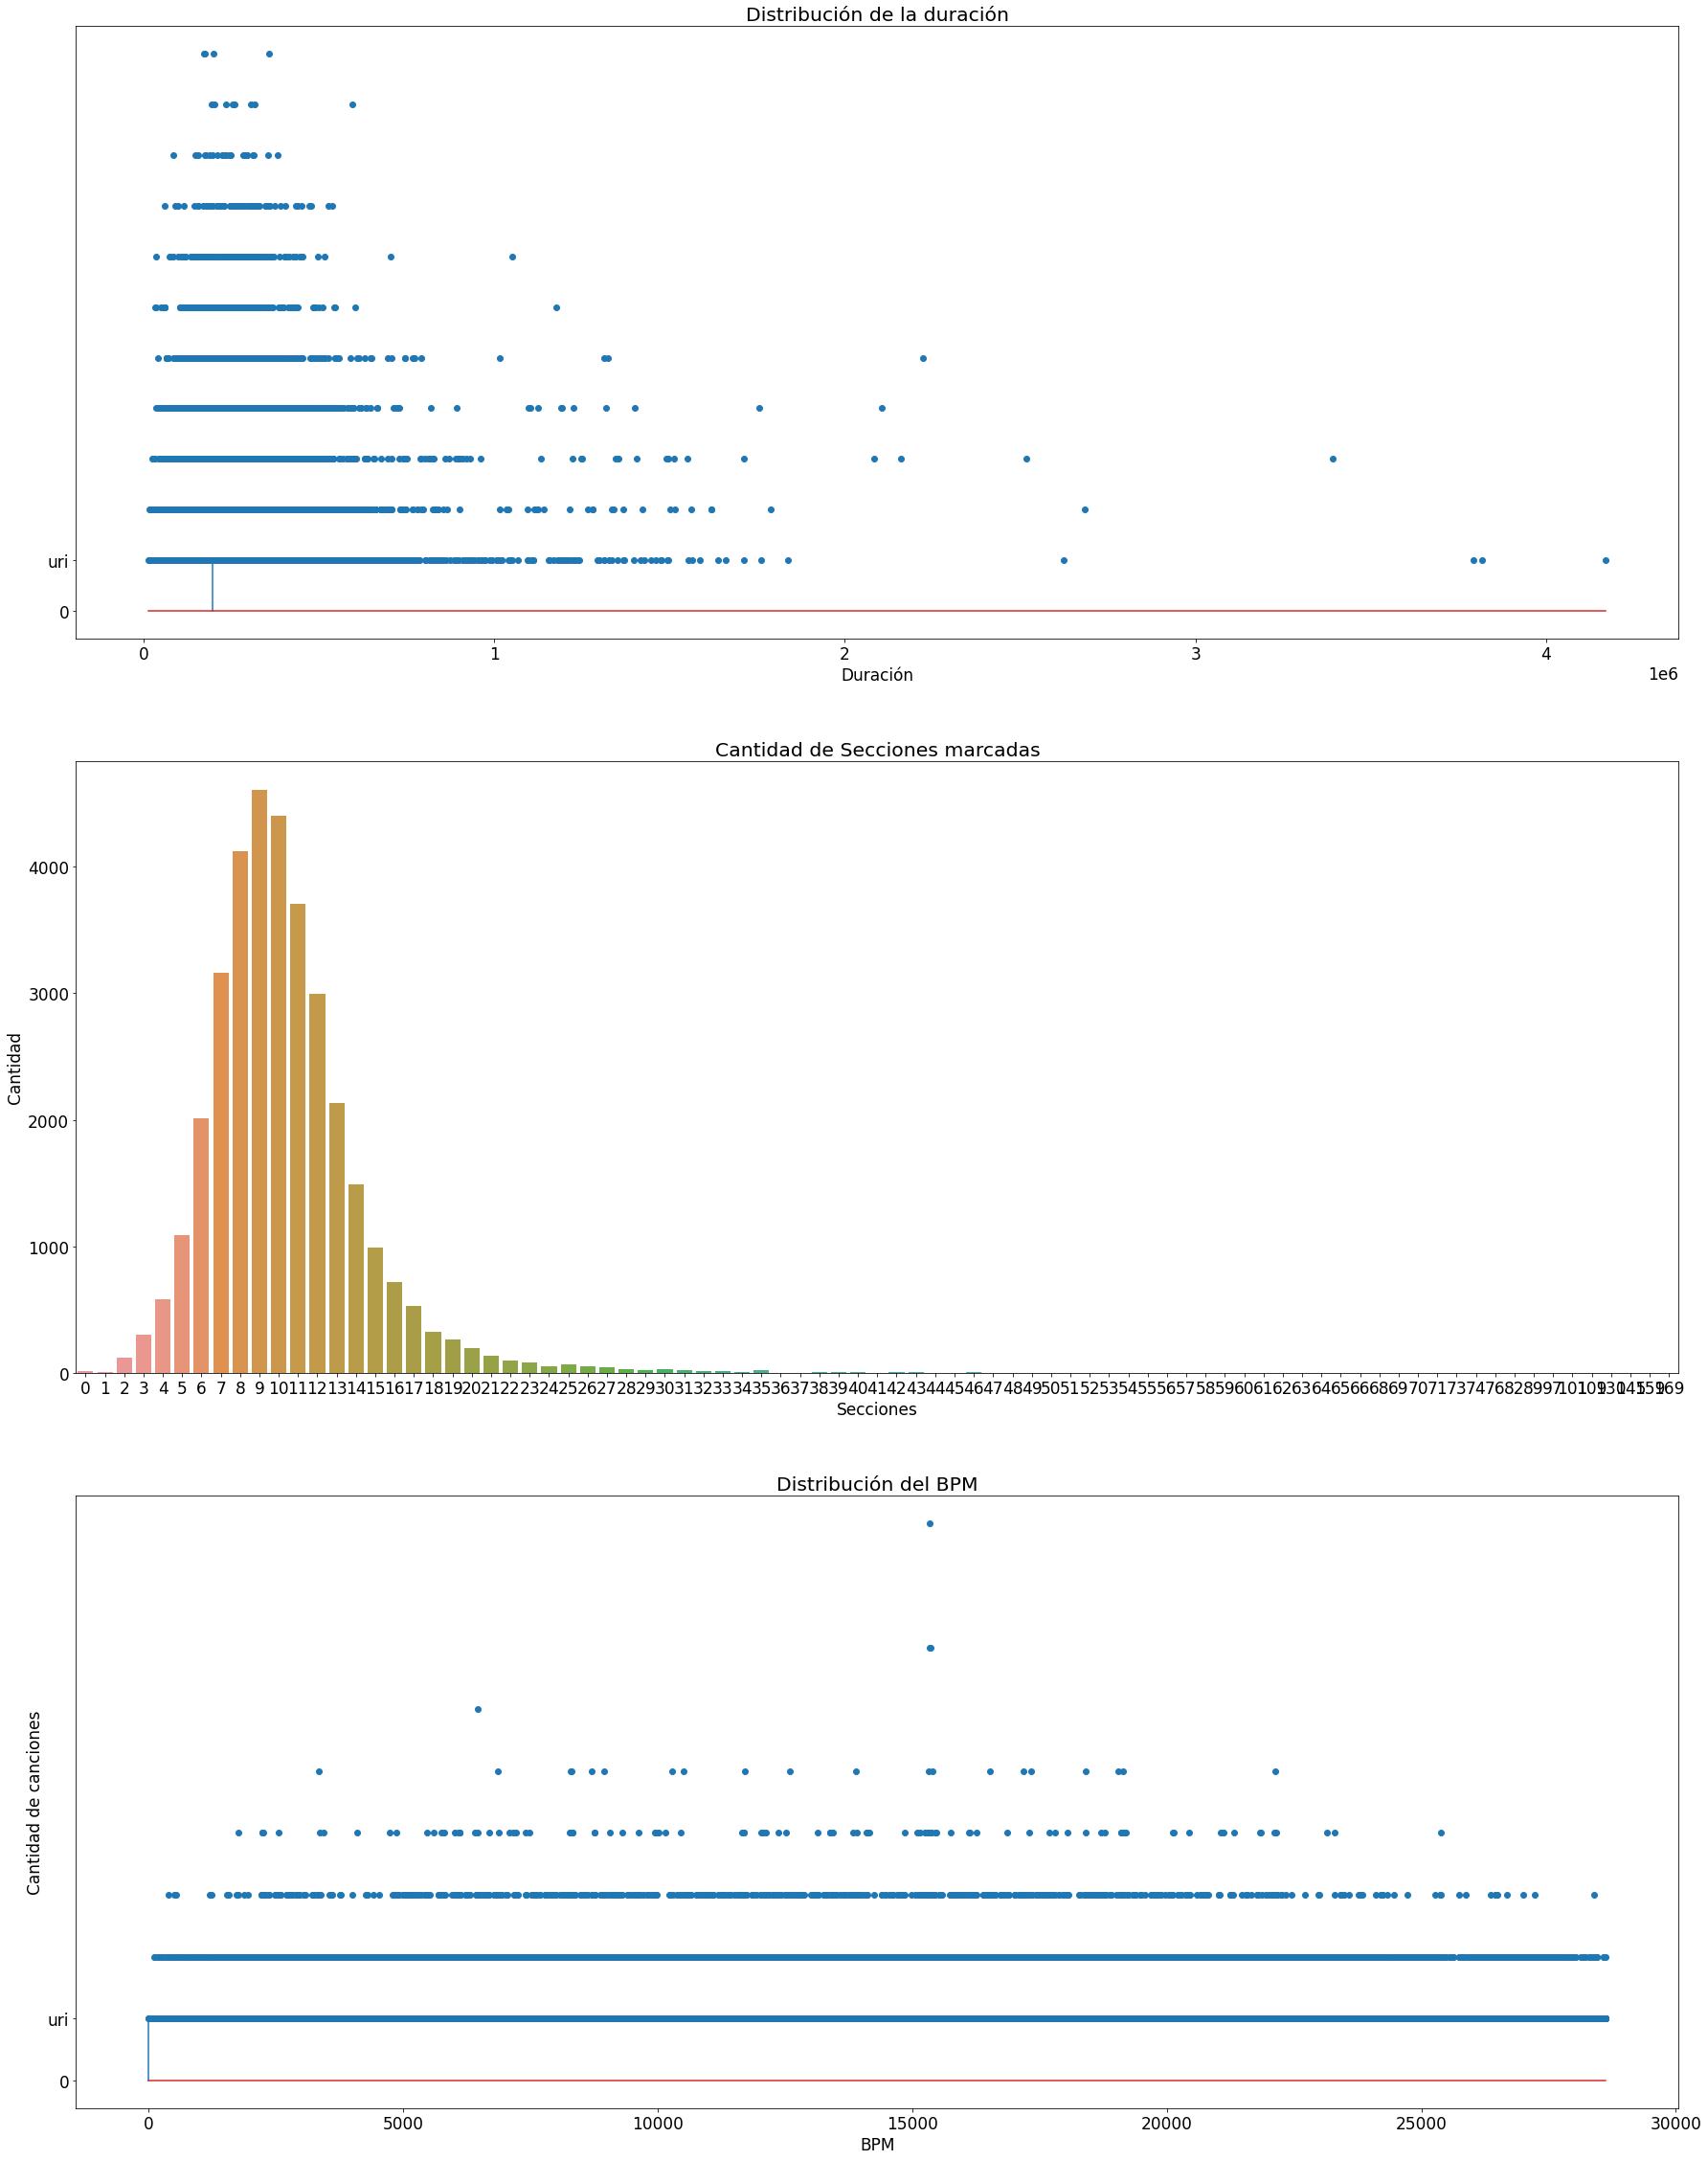

In [10]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=[30, 40])

axs[0].stem(df['duration_ms'].unique() , df[['uri','duration_ms']].groupby(['duration_ms']).count())
sns.countplot(df['sections'],ax=axs[1])
axs[2].stem(df[['uri','tempo']].groupby(['tempo']).count())


axs[0].set_xlabel('Duración')
axs[0].set_ylabel('')
axs[0].set_title('Distribución de la duración')


axs[1].set_xlabel('Secciones')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Cantidad de Secciones marcadas')

axs[2].set_xlabel('BPM')
axs[2].set_ylabel('Cantidad de canciones')
axs[2].set_title('Distribución del BPM')

plt.tight_layout
plt.show()

En función de la duración, se observa que hay outliers, mientras que la mayoría de las canciones se acumula entre tiempos menores a 2e6 ms.
Observando la cantidad de secciones, sucede lo mismo que con el tiempo, hay outliers. Sacando del análsis estos, se observa que la distribución se asemeja a una distribución normal.
En cuanto a la distribución del BPM, evitando picos de 'ruido', la misma se asemeja a una distribución uniforme.

### Análisis Bivariado


Relación entre la duración de una canción y cuán instrumentales. Al tener el tiempo discretizado en ms es complicado hacer un análisis. Hay que buscar la manera de normalizar este valor.
Se busca ver si hay una correlación entre la duración del tema y cuán instrumental es. La hipótesis del análsis es que a mayor duración, más instrumental es el tema.

In [11]:
df[['uri','duration_ms','instrumentalness']].groupby(['instrumentalness', 'duration_ms' ]).count()

uri
instrumentalness duration_ms     
0.000            15920          1
                 21587          1
                 23133          1
                 28320          1
                 30376          1
...                           ...
0.999            20573          1
                 128430         1
                 167137         1
                 195907         1
1.000            198623         1

[31895 rows x 1 columns]

Agrupando valores se puede hacer una análisis más consistente. Lo esperable sería que a mayor duración del la canción, mayor tiempo instrumental tenga.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performa

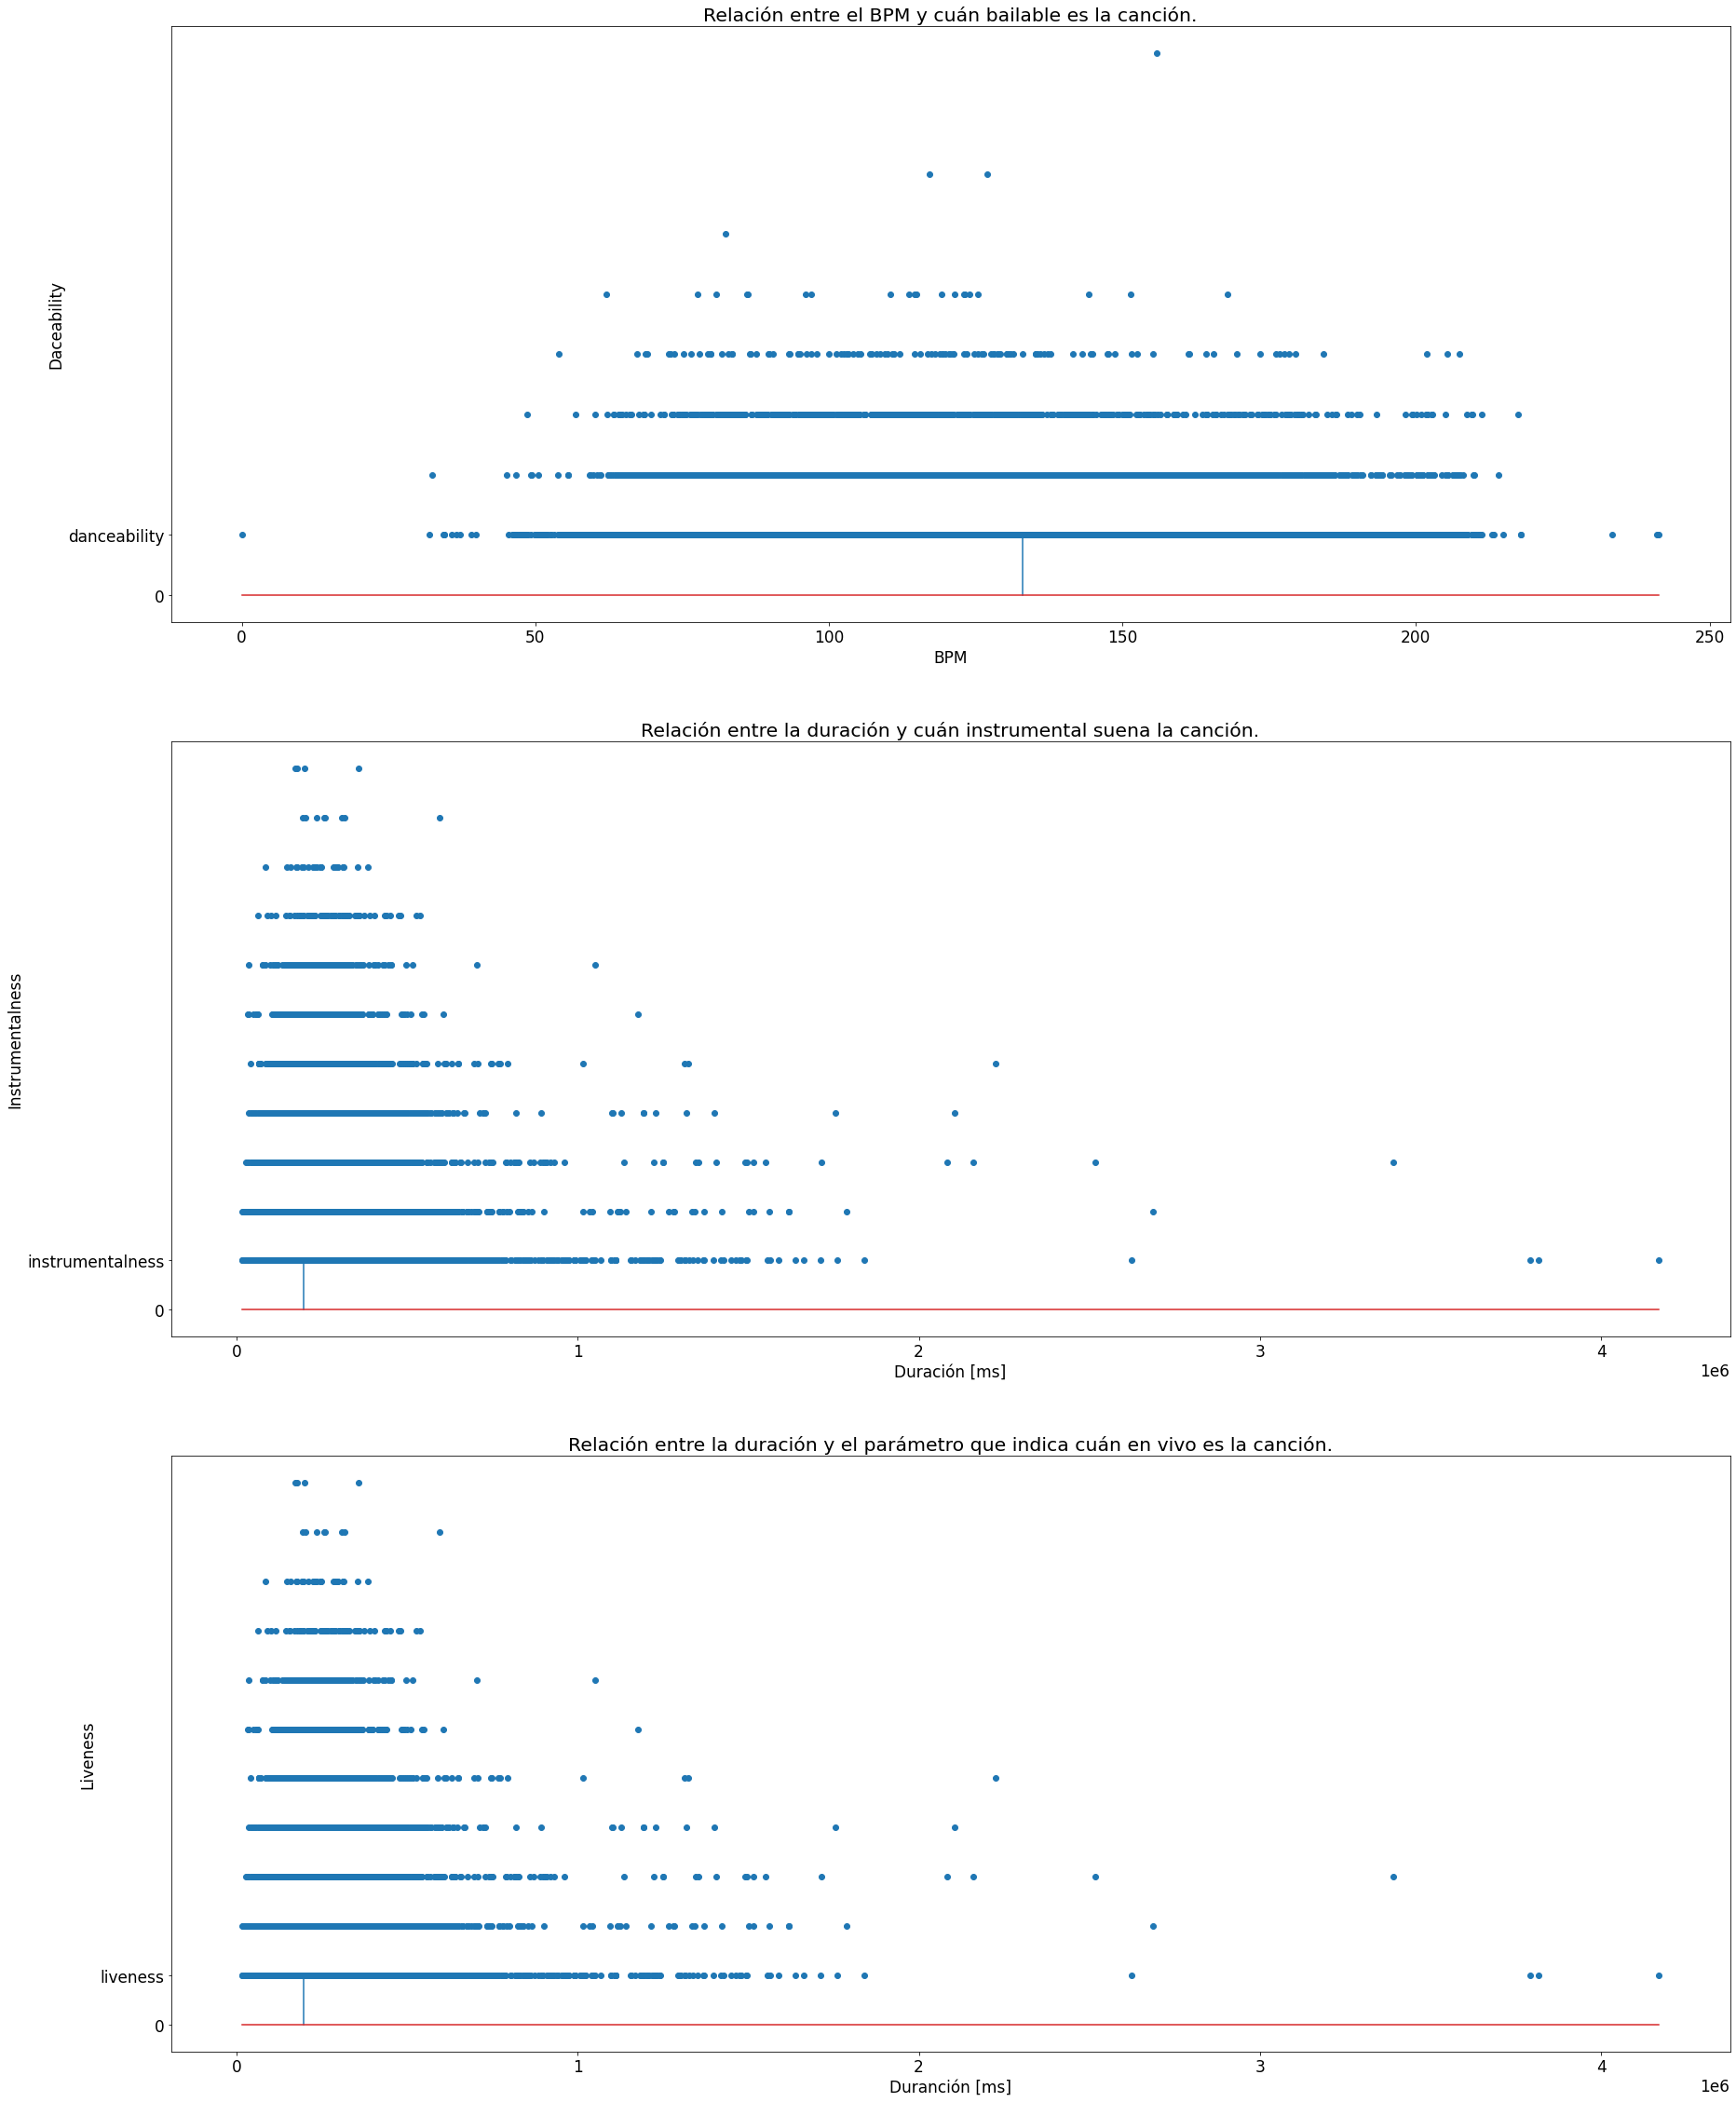

In [12]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=[30, 40])

axs[0].stem(df['tempo'].unique() , df[['tempo','danceability']].groupby(['tempo']).count())
axs[1].stem(df['duration_ms'].unique() , df[['duration_ms','instrumentalness']].groupby(['duration_ms' ]).count())
axs[2].stem(df['duration_ms'].unique() , df[['duration_ms','liveness']].groupby(['duration_ms']).count() )

axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Daceability')
axs[0].set_title('Relación entre el BPM y cuán bailable es la canción.')

axs[1].set_xlabel('Duración [ms]')
axs[1].set_ylabel('Instrumentalness')
axs[1].set_title('Relación entre la duración y cuán instrumental suena la canción.')

axs[2].set_xlabel('Duranción [ms]')
axs[2].set_ylabel('Liveness')
axs[2].set_title('Relación entre la duración y el parámetro que indica cuán en vivo es la canción.')



plt.tight_layout
plt.show()

Normalizar uno de los primeros anális deja agrupar de una manera mejor. Agrupando valores se puede hacer una análisis más consistente. Lo esperable sería que a mayor duración del la canción, mayor tiempo instrumental tenga. 
Además hay que evaluar la distribución de tiempo, ya que no es esperable que haya mayor concentración entre las duraciones más bajas de los temas. 

Haciendo un plot invirtiendo los ejes, se ve que hay muchas canciones que tienen valor de instrulmentalness = 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


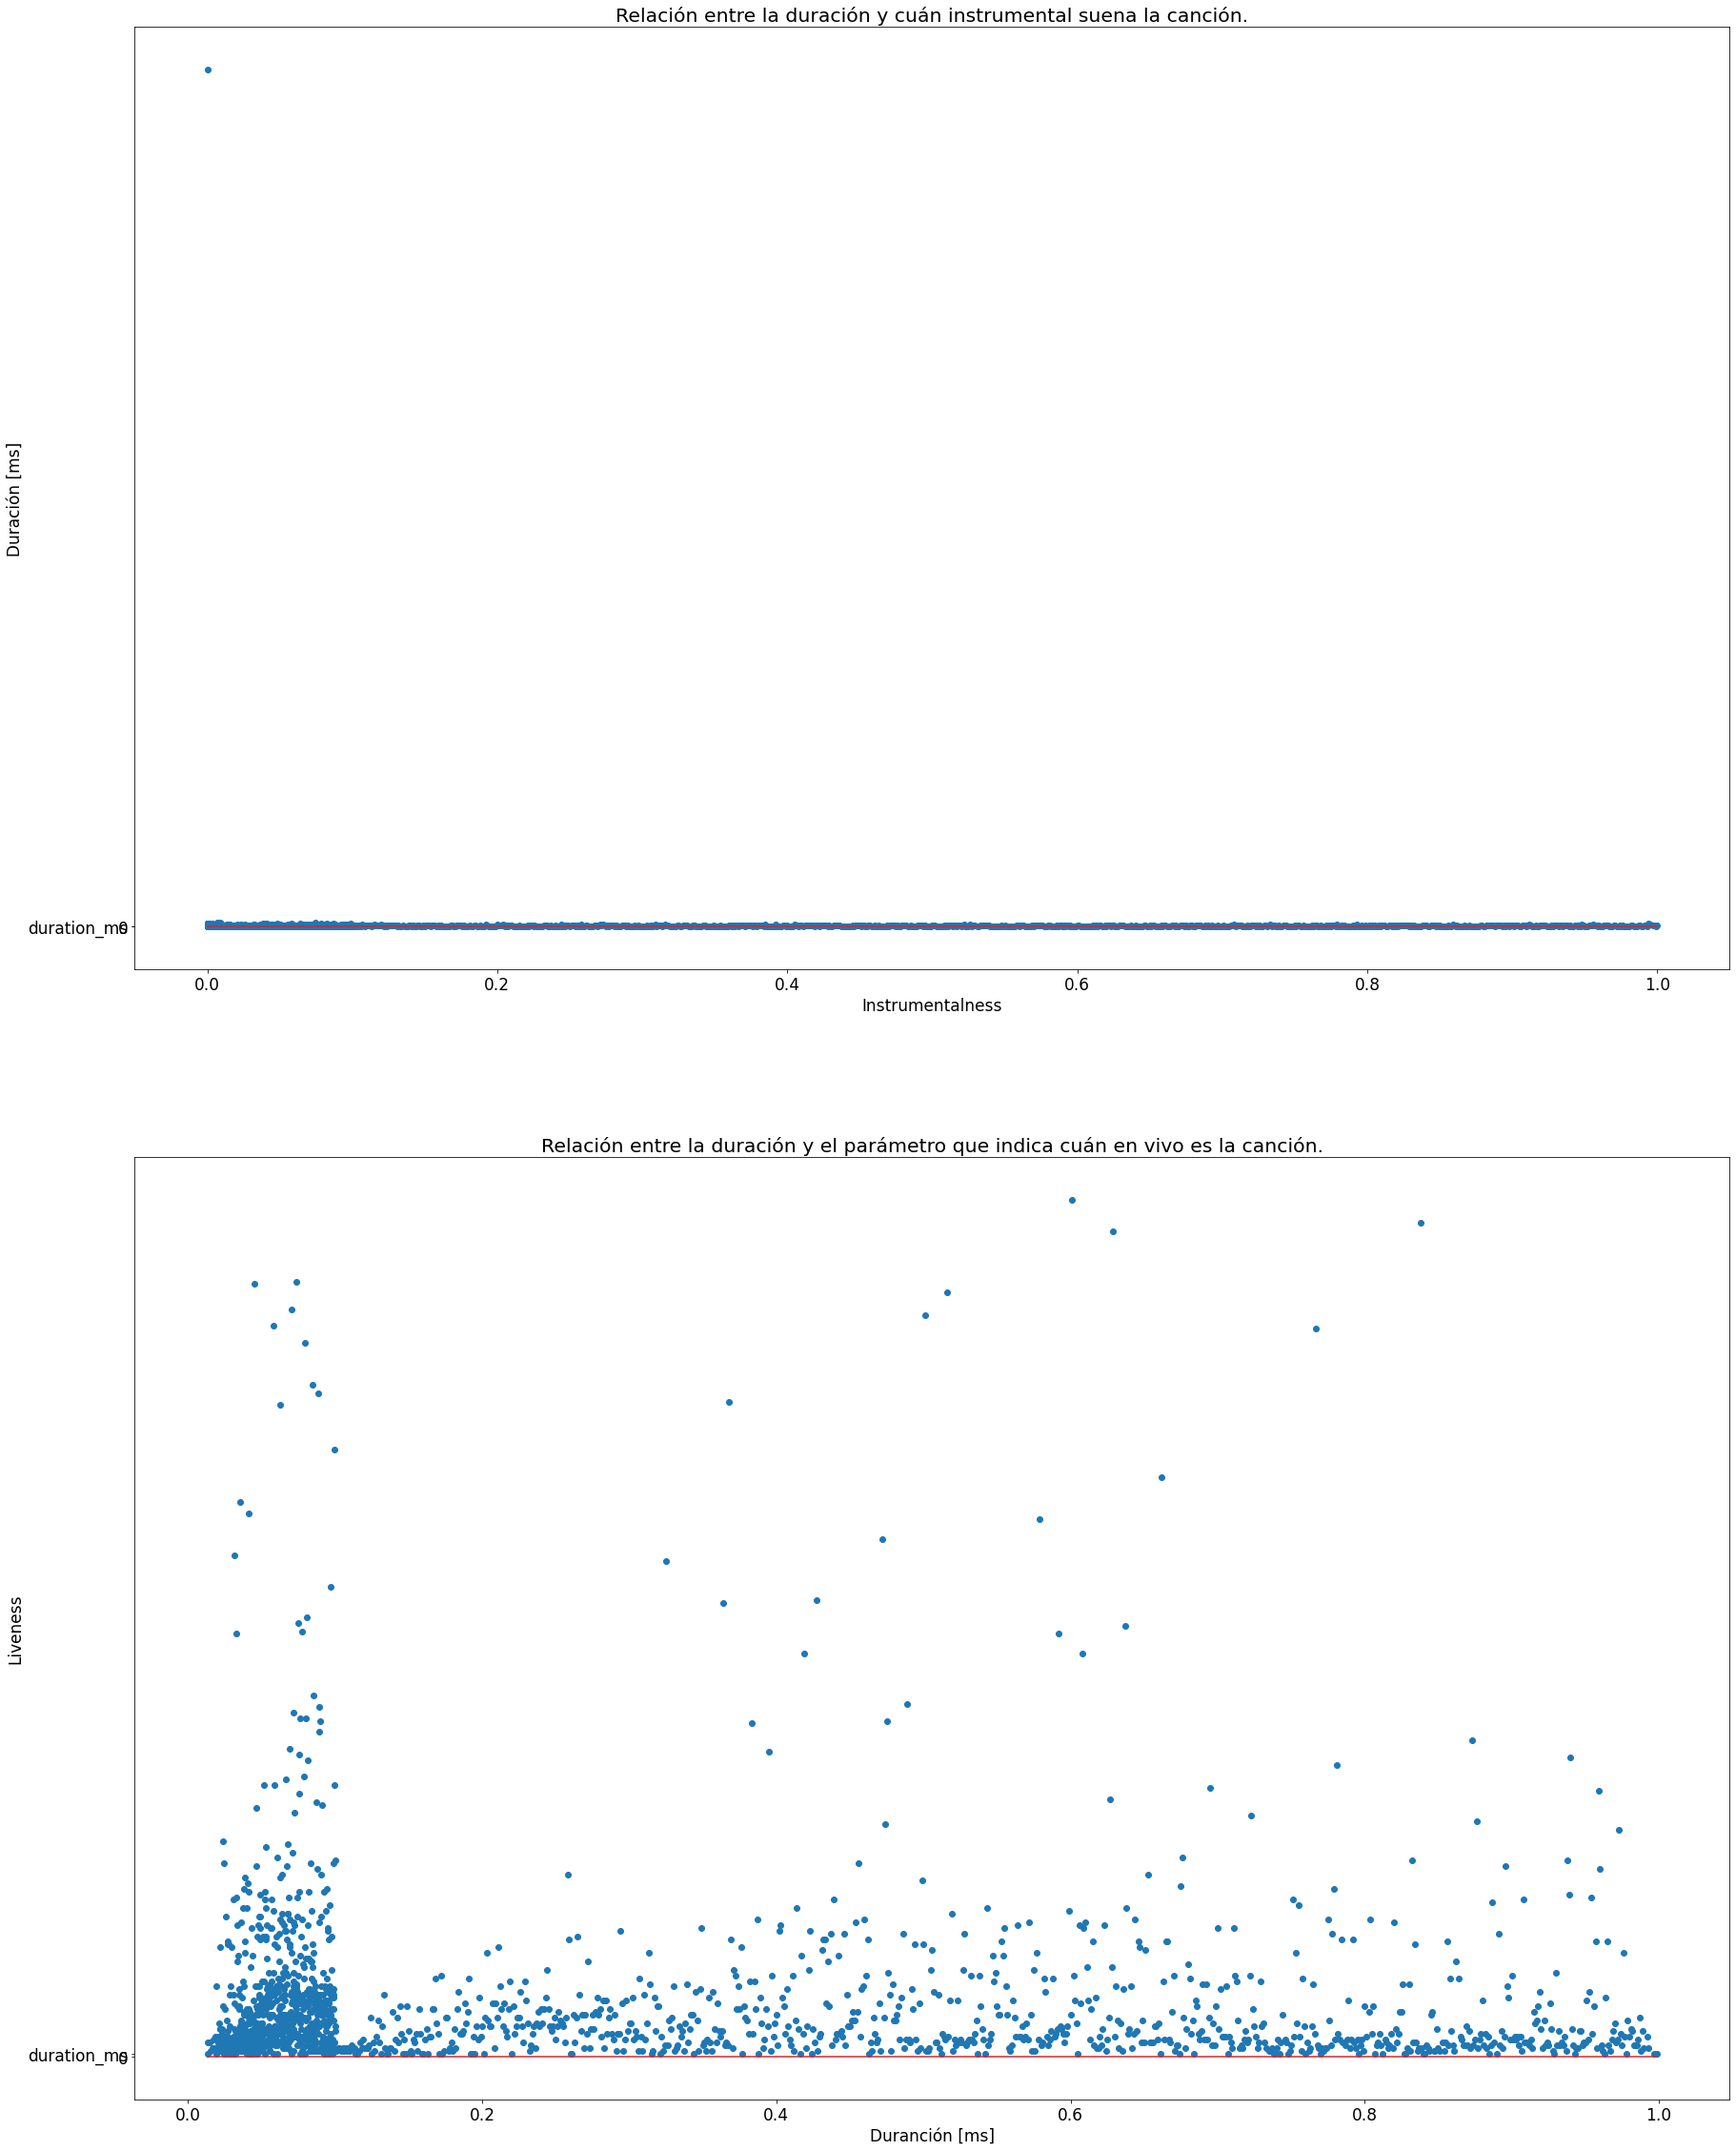

In [13]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False, figsize=[30, 40])

axs[0].stem(df['instrumentalness'].unique() , df[['duration_ms','instrumentalness']].groupby(['instrumentalness' ]).count() )
axs[1].stem(df['liveness'].unique() , df[['duration_ms','liveness']].groupby(['liveness']).count() )

##axs[1].stem(df['liveness'].unique() , df[['duration_ms','liveness']].groupby(['liveness']).count() , use_line_collection = True)



axs[0].set_ylabel('Duración [ms]')
axs[0].set_xlabel('Instrumentalness')
axs[0].set_title('Relación entre la duración y cuán instrumental suena la canción.')

axs[1].set_xlabel('Duranción [ms]')
axs[1].set_ylabel('Liveness')
axs[1].set_title('Relación entre la duración y el parámetro que indica cuán en vivo es la canción.')



plt.tight_layout
plt.show()

#### Análisis Multivariado


Lectura del datasource. Tomamos la década de los 90's para poder hacer una lectura más aproximada de los valores que deseamos visualizar.

In [14]:
url90 ='https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-90s.csv' 
df90 = pd.read_csv(url90, index_col = 0) 
df90['Decade'] = '90' 
df90.head() 

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Decade
track,,,,,,,,,,,,,,,,,,,
Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,90
Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,90
Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,90
Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,90
До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,90


In [15]:
df90.shape

(5520, 19)

Realizamos un scatter para visualizr la dependencia entre la duración y la time signature. Podemos observar que durante este período existe una proporción mayor de tracks con 4 beats por compás y que casi el total de los tracks analizados se encuentran entre el 0 y 0.50 de duration. 

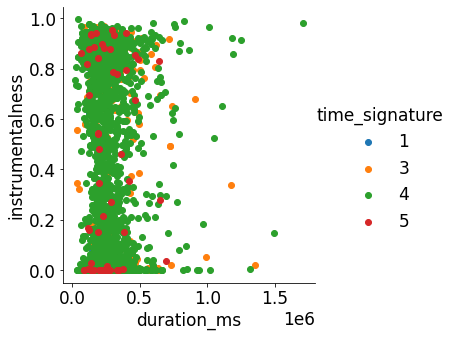

In [16]:
sns.FacetGrid(df90,hue = 'time_signature' , height = 5).map(plt.scatter,'duration_ms','instrumentalness').add_legend();
plt.show()

En este gráfico pudimos observar de acuerdo al valor de "Target" (si alcanzó o no el Top 100 de Billboard) que si bien la mayoría de los tracks que han alcanzado los charts NO son instrumentales, aquellas que sí lo han alcanzado, son las que tienen mayor Danceability. 

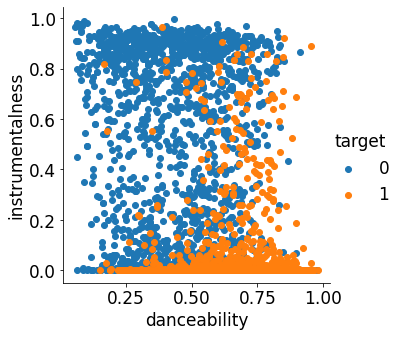

In [17]:
sns.FacetGrid(df90,hue = 'target' , height = 5).map(plt.scatter,'danceability','instrumentalness').add_legend();
plt.show()

En este gráfico tratamos de acreditar o desacreditar la hipótesis de que la 'valence' de los tracks analizados dependen directamente de la clave en la que se encuentran y su nivel de instrumental. Logramos obtener a través de la visualización que existe una concentración significativa de tracks instrumentales con 'valence' baja, que la mayoría significativa de canciones del período son vocales, y que en este rango, las claves de preferencia son 8, 9 y principalmente, 10 y 11. (Suponemos que hablan de Si bemol, si, la bemol y la) 

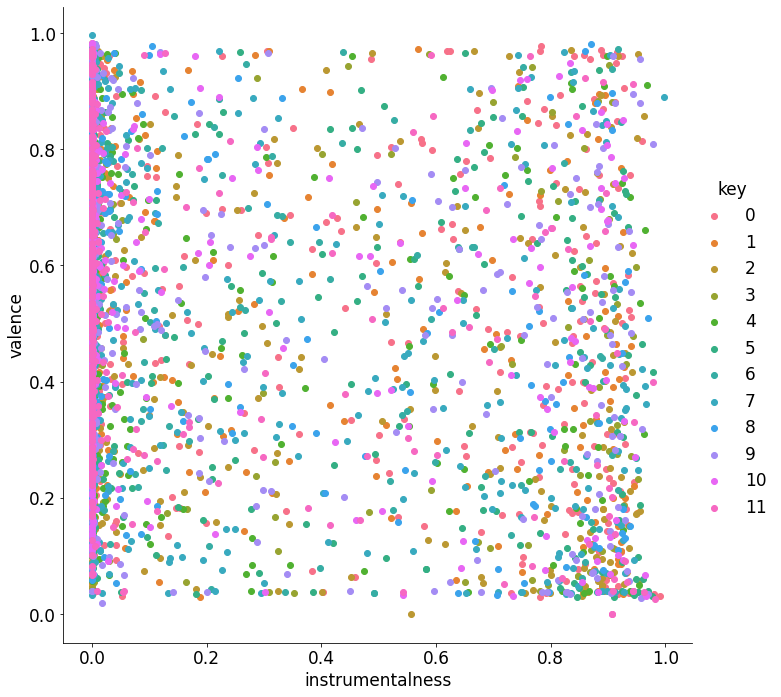

In [18]:
sns.FacetGrid(df90,hue = 'key' , height = 10).map(plt.scatter,'instrumentalness','valence').add_legend();
plt.show()

### Implementación de modelo para clasificación de Target



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Elimino el resultado, en la columna 'target' y todos los campos string. 

In [20]:
X = df.drop(["target", "artist", "uri"], axis=1)
y = df["target"]

Separación en train y test

In [21]:
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=27)

Creación del arbol de decisión y de la predicción

In [22]:
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)
y_test_pred = tree.predict(X_test) 

Accuracy


In [23]:
DT_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos:',DT_accuracy)

% de aciertos: 0.7126668587342745


Matriz de Confusión

[[3750 1456]
 [1536 3671]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


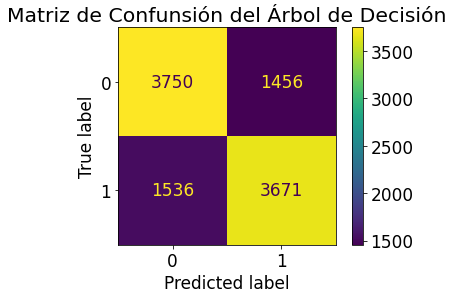

In [24]:

print(confusion_matrix(y_test, y_test_pred))

plt.rcParams.update({'font.size': 17})
plot_confusion_matrix(tree, X_test, y_test)
plt.title('Matriz de Confunsión del Árbol de Decisión')
plt.show()

Recall Score

In [25]:
DT_recall_score = recall_score(y_test, y_test_pred)
print("Recall Score del clasificador da:" , DT_recall_score)

Recall Score del clasificador da: 0.7050124831956981


F1 Score

In [26]:
DT_f1_score = f1_score(y_test, y_test_pred)
print("F1 Score del clasificador da:" ,  f1_score)

F1 Score del clasificador da: <function f1_score at 0x7f279c881290>


Curva ROC

AUC para el clasificador da: {0.7129442686309639}


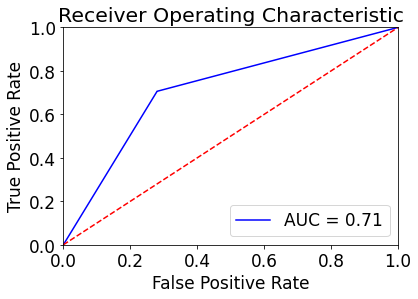

In [27]:
class_probabilities = tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print("AUC para el clasificador da:" ,{roc_auc})

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Random Forest**

In [28]:
model = RandomForestClassifier(random_state=11, n_estimators=200, class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

Ejecuto la predicción del Test


In [29]:
y_test_pred = model.predict(X_test)

Accuracy

In [30]:
RF_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos:', RF_accuracy)

% de aciertos: 0.7964083357341785


Recall Score

In [31]:
RF_recall_score = recall_score(y_test, y_test_pred)
print("Recall Score del clasificador Random Forest da:", RF_recall_score)

Recall Score del clasificador Random Forest da: 0.8392548492414058


F1 Score

In [32]:
RF_f1_score = f1_score(y_test, y_test_pred)
print("F1 Score del clasificador Random Forest da:" , RF_f1_score)

F1 Score del clasificador Random Forest da: 0.8047882136279927


In [33]:
DT_Indicadores = [DT_accuracy, DT_recall_score, DT_f1_score]
RF_Indicadores = [RF_accuracy, RF_recall_score, RF_f1_score]
definiciones = ['Accuracy: Porcentaje de casos acertados', 'Recall Score: Porcentaje de casos identificados', 'F1: Media Harmónica entre Accuracy y Recall Score']

data_indicadores = {'definiciones': definiciones, 'Decision Tree': DT_Indicadores, 'Random Forest': RF_Indicadores}
df_indicadores = pd.DataFrame(data_indicadores)
df_indicadores

,definiciones,Decision Tree,Random Forest
0,Accuracy: Porcentaje de casos acertados,0.712667,0.796408
1,Recall Score: Porcentaje de casos identificados,0.705012,0.839255
2,F1: Media Harmónica entre Accuracy y Recall Score,0.710470,0.804788


### Conclusiones

Observando las métricas indicadoras de performance de los modelos, se observa que el Modelo Random Forest es que el que perfoma mejor. Respecto del Árbol de Decisión, el modelo Random Forest tiene mayor porcentaje de casos acertados (Accuracy), por lo que indicaría menos pérdida en el negocio en los esfuerzos de publicar un tema para que sea un éxito. A su vez, tiene mayor porcentaje de casos indentificadores frente al otro modelo, por lo que también generaría más ganancia, ya que tendría más precisión en los aciertos. En cuanto a la métrica F1, el valor que más se acerca a 1 es el del modelo Random Forest, haciendo que el modelo sea más tendiente a el balanance entre la precisión y el porcentaje de casos acertados. 

A modo de conclusión general, para este negocio y estos tipos de datos, es conveniente utilizar el Modelo Random Forest.